In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/clean_car.csv')

In [12]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         10 non-null     object 
 1   Model                10 non-null     object 
 2   Sales_in_thousands   10 non-null     float64
 3   __year_resale_value  9 non-null      float64
 4   Vehicle_type         10 non-null     object 
 5   Price_in_thousands   9 non-null      float64
 6   Engine_size          10 non-null     float64
 7   Horsepower           10 non-null     int64  
 8   Wheelbase            10 non-null     float64
 9   Width                10 non-null     float64
 10  Length               10 non-null     float64
 11  Curb_weight          10 non-null     float64
 12  Fuel_capacity        10 non-null     float64
 13  Fuel_efficiency      10 non-null     int64  
 14  Latest_Launch        10 non-null     object 
 15  Power_perf_factor    9 non-null      float6

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,1
Vehicle_type,0
Price_in_thousands,1
Engine_size,0
Horsepower,0
Wheelbase,0
Width,0


In [15]:
df['Price_in_thousands'].fillna(0, inplace=True)
df['Manufacturer'].fillna('Unknown', inplace=True)

/tmp/ipython-input-15-1068304095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_in_thousands'].fillna(0, inplace=True)
/tmp/ipython-input-15-1068304095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [16]:
df.dropna(inplace=True)

In [18]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Reqemsel klonlar: ", num_cols)
print("Kategorik klonlar", cat_cols)

Reqemsel klonlar:  Index(['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')
Kategorik klonlar Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')


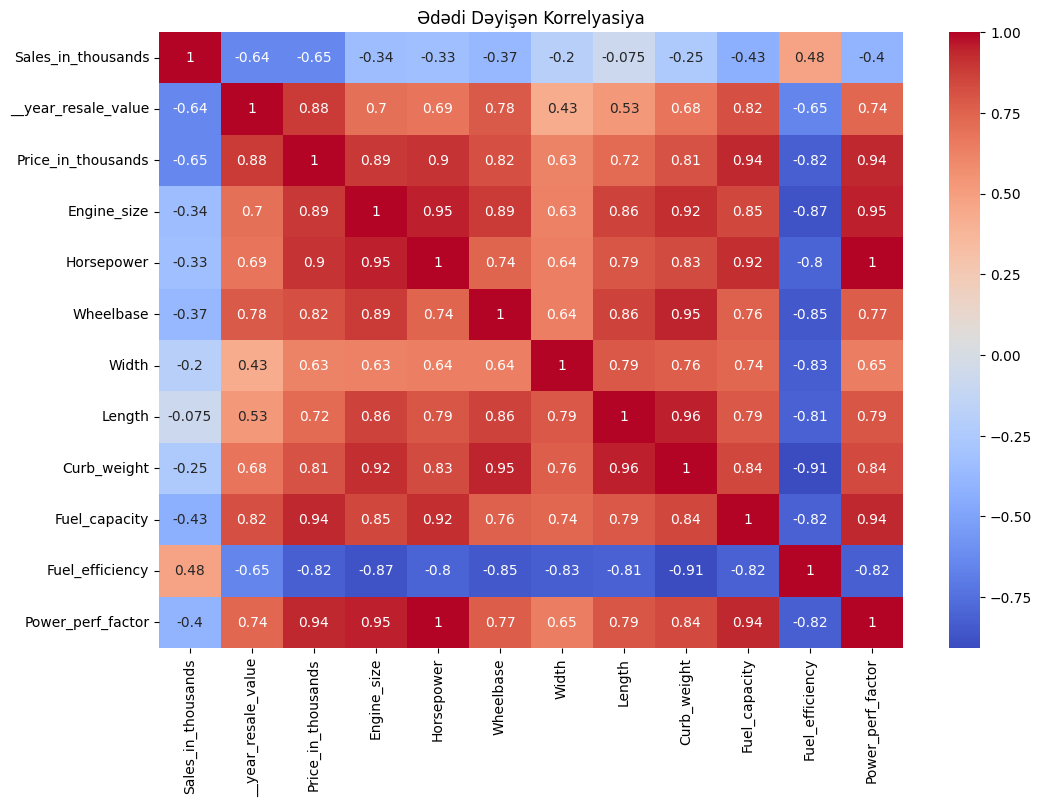

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Ədədi Dəyişən Korrelyasiya")
plt.show()

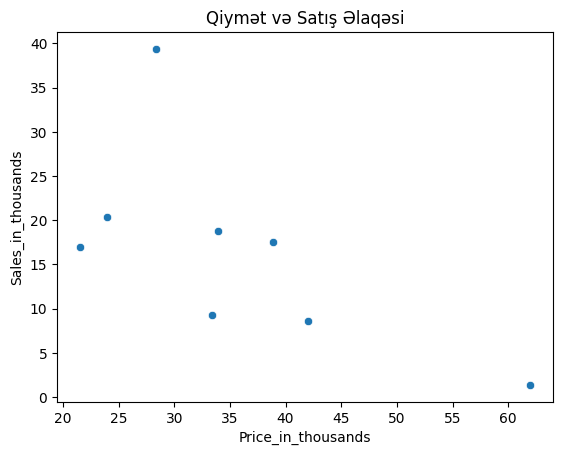

In [22]:
sns.scatterplot(data=df, x='Price_in_thousands', y='Sales_in_thousands')
plt.title('Qiymət və Satış Əlaqəsi')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X = df[['Price_in_thousands']]
y = df['Sales_in_thousands']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSEL {mse}")
print(f"r2: {r2}")

MSEL 267.5189989855666
r2: 0.2591061271810059


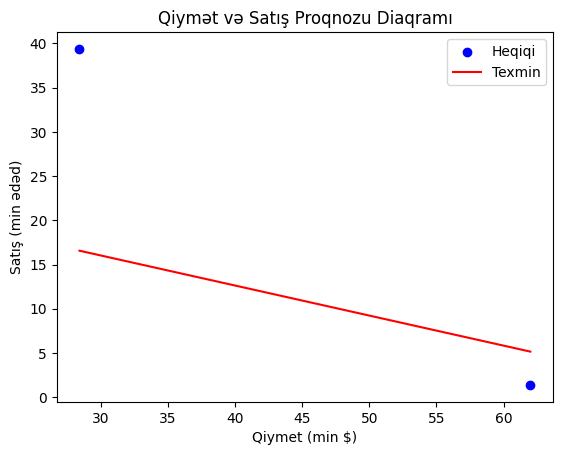

In [31]:
plt.scatter(X_test, y_test, color='blue', label='Heqiqi')
plt.plot(X_test, y_pred, color='red', label='Texmin')
plt.title('Qiymət və Satış Proqnozu Diaqramı')
plt.xlabel('Qiymet (min $)')
plt.ylabel('Satış (min ədəd)')
plt.legend()
plt.show()